# Script to plot histograms of *most* of the parameters in the TRILEGAL selection, before any cuts are made.

This script will take in a code from a TRILEGAL model sample and plot some of the key parameters from that sample. This allows the user to check that the correct range of parameters has been collected. This could potentially reduce errors that may have been made when the sample was drawn (i.e. inputting the wrong limiting magnitude for example). This group of histograms plots the following parameters: 

* Age – logAge – [Gyr]
* Initial Composition – [M/H]
* Initial Mass – m_ini – [Msun]
* Luminosity – logL – [Lsun]
* Effective Temperature – logTe – [K]
* Surface Gravity – logg – [cgs]
* Distance Modulus – m-M0 
* Extinction – Av – [V-band]
* Bolometric Magnitude – Mbol – [mag]
* Kepler Magnitude – Kepler – [mag]
* Actual Mass – Mact – [Msun]

The Galactic Component ratios are also given. The galactic components are as follows: 

1 = Thin disc, 2 = Thick disc, 3 = Halo, 4 = Bulge, 5 = Additional object

When applicable a vertical line in shown on the histogram for the solar value. 

In [8]:
# User inputs - Path to file where the TRILEGAL model can be found
path = '/Users/Jess/SF_m_dwarfs/SF_trilegal_data/full_trilegal_sample_index.csv'

In [11]:
# Import modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# Open file and pull parameters 
trilegal = pd.read_csv(path, delimiter=',')
gc = trilegal['Gc'] # Galactic component
age = trilegal['logAge'] # Age
comp = trilegal['[M/H]'] # Initial Composition
initial_mass = trilegal['m_ini'] # Initial Mass
lum = trilegal['logL'] # Luminosity 
temp = trilegal['logTe'] # Effective Temperature
logg = trilegal['logg'] # Surface Gravity 
dist_mod = trilegal['m-M0'] # Distance Modulus
ext = trilegal['Av'] # Extinction
bol_mag = trilegal['mbol'] # Bolometric Magnitude
kepler = trilegal['Kepler'] # Kepler Magnitude
actual_mass = trilegal['Mact'] # Actual Mass 



15626279


In [16]:
# Breaking down numbers for galactic components 
gc_1 = gc[gc == 1] # Thin disk
gc_2 = gc[gc == 2] # Thick disk
gc_3 = gc[gc == 3] # Halo stars
gc_4 = gc[gc == 4] # Bulge
gc_5 = gc[gc == 5] # Additional objects 

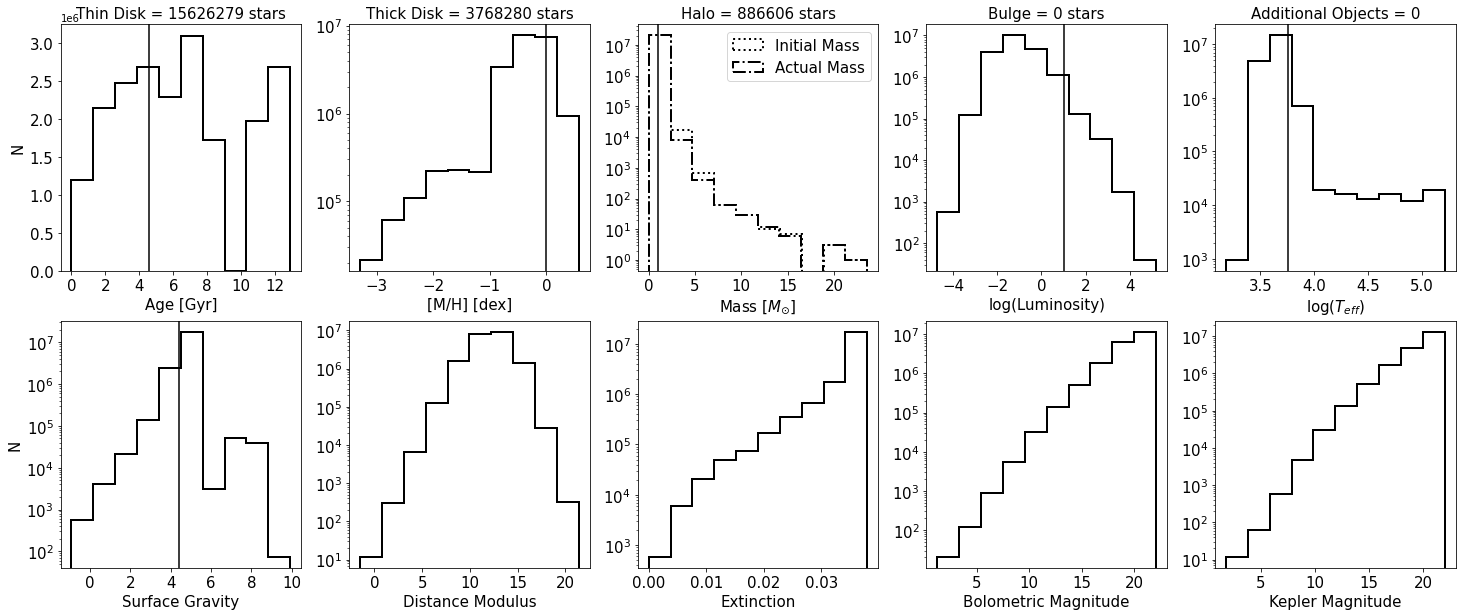

In [19]:
plt.figure(figsize=(25,10))

# Age
plt.subplot(251)
plt.title('Thin Disk = ' + str(len(gc_1)) + ' stars', fontsize=15)
plt.hist((10**age)/1e9, histtype='step', linewidth=2, color='black')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('N', fontsize=15)
plt.xlabel('Age [Gyr]', fontsize=15)
plt.axvline(4.6, color='black')

# Composition
plt.subplot(252)
plt.title('Thick Disk = ' + str(len(gc_2)) + ' stars', fontsize=15)
plt.hist(comp, histtype='step', linewidth=2, color='black')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axvline(0, color='black')
plt.yscale('log')
plt.xlabel('[M/H] [dex]', fontsize=15)

# Mass
plt.subplot(253)
plt.title('Halo = ' + str(len(gc_3)) + ' stars', fontsize=15)
plt.hist(initial_mass, label='Initial Mass', histtype='step', linewidth=2, color='black', linestyle=':')
plt.hist(actual_mass, label='Actual Mass', histtype='step', linewidth=2, color='black', linestyle='-.')
plt.xticks(fontsize=15)
plt.legend(loc='best', fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.axvline(1, color='black')
plt.xlabel(r'Mass $[M_{\odot}]$', fontsize=15)

# Luminosity 
plt.subplot(254)
plt.title('Bulge = ' + str(len(gc_4)) + ' stars', fontsize=15)
plt.hist(lum, histtype='step', linewidth=2, color='black')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('log(Luminosity)', fontsize=15)
plt.yscale('log')
plt.axvline(1, color='black')

# Temperature 
plt.subplot(255)
plt.title('Additional Objects = ' + str(len(gc_5)), fontsize=15)
plt.hist(temp, histtype='step', linewidth=2, color='black')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.xlabel(r'log$(T_{eff})$', fontsize=15)
plt.axvline(3.76, color='black')

# Surface Gravity 
plt.subplot(256)
plt.hist(logg, histtype='step', linewidth=2, color='black')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.ylabel('N', fontsize=15)
plt.xlabel('Surface Gravity', fontsize=15)
plt.axvline(4.4, color='black')

# Distance Modulus 
plt.subplot(257)
plt.hist(dist_mod, histtype='step', linewidth=2, color='black')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Distance Modulus', fontsize=15)
plt.yscale('log')

# Extinction 
plt.subplot(258)
plt.hist(ext, histtype='step', linewidth=2, color='black')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.xlabel('Extinction', fontsize=15)

# Bolometric Magnitude 
plt.subplot(259)
plt.hist(bol_mag, histtype='step', linewidth=2, color='black')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.xlabel('Bolometric Magnitude', fontsize=15)

# Kepler Magnitude 
plt.subplot(2,5,10)
plt.hist(kepler, histtype='step', linewidth=2, color='black')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.xlabel('Kepler Magnitude', fontsize=15)

plt.savefig('/Users/jess/sf_m_dwarfs/sf_plots/P_all_trilegal_parameters.png')